# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#f'https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&exclude={part}&appid={weather_api_key}'



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | mezdra
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | umm kaddadah
Processing Record 7 of Set 1 | revelstoke
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | ad dilam
Processing Record 12 of Set 1 | kiruna
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | ko pha ngan
Processing Record 16 of Set 1 | al ghayzah
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | iaciara
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | gisborne
Processing Record 21 of Set 1 | babolsar
Processing Record 22 of S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,-0.50,58,0,2.06,CA,1713695050
1,mezdra,43.1500,23.7000,16.26,51,83,3.43,BG,1713695051
2,waitangi,-43.9535,-176.5597,12.68,93,100,1.34,NZ,1713695051
3,invercargill,-46.4000,168.3500,11.68,95,96,5.81,NZ,1713695051
4,ancud,-41.8697,-73.8203,6.08,88,55,3.44,CL,1713695051


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,-0.50,58,0,2.06,CA,1713695050
1,mezdra,43.1500,23.7000,16.26,51,83,3.43,BG,1713695051
2,waitangi,-43.9535,-176.5597,12.68,93,100,1.34,NZ,1713695051
3,invercargill,-46.4000,168.3500,11.68,95,96,5.81,NZ,1713695051
4,ancud,-41.8697,-73.8203,6.08,88,55,3.44,CL,1713695051


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

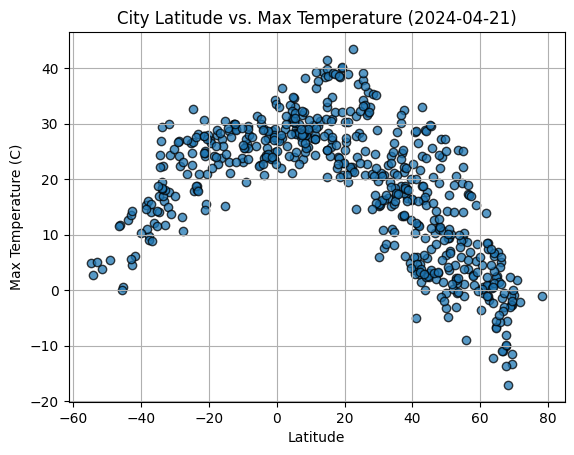

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-04-21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

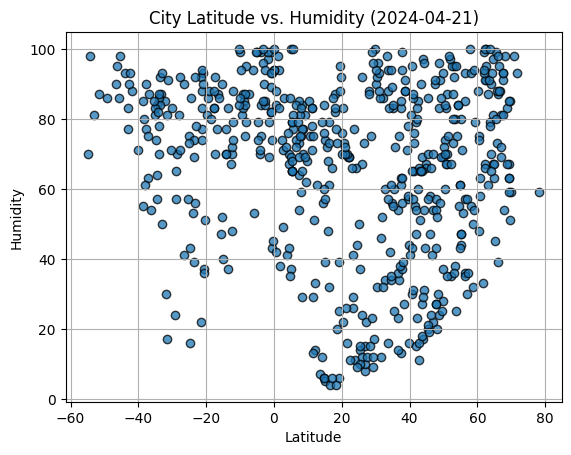

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-04-21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

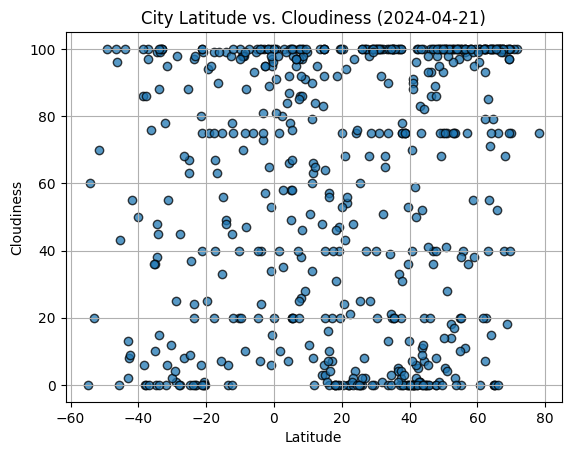

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-04-21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

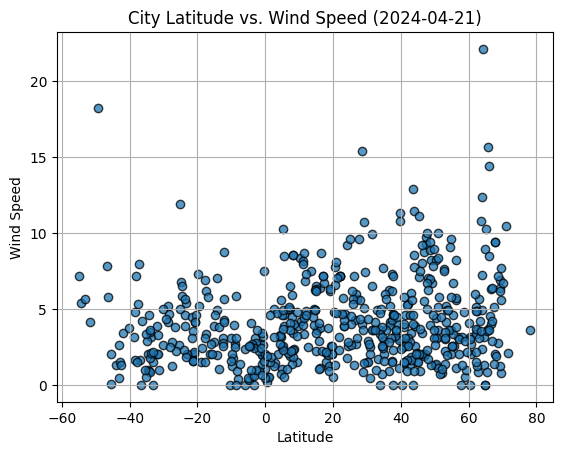

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-04-21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def plot_linear_regress(x_values, y_values, xlabel, ylabel, set_xy):
     
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    plt.scatter(x_values, y_values, alpha=0.75)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(line_eq, xy=set_xy, fontsize=18, color="red")
    
    # Label plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Print r value
    print(f"The r value is: {rvalue}")
    print(line_eq)

    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,-0.50,58,0,2.06,CA,1713695050
1,mezdra,43.1500,23.7000,16.26,51,83,3.43,BG,1713695051
5,umm kaddadah,13.6017,26.6876,39.28,7,100,7.50,SD,1713695052
6,revelstoke,50.9832,-118.2023,7.01,87,100,3.60,CA,1713695052
8,bethel,41.3712,-73.4140,3.85,76,0,1.54,US,1713695052


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,12.68,93,100,1.34,NZ,1713695051
3,invercargill,-46.4000,168.3500,11.68,95,96,5.81,NZ,1713695051
4,ancud,-41.8697,-73.8203,6.08,88,55,3.44,CL,1713695051
7,port-aux-francais,-49.3500,70.2167,5.39,86,100,18.20,TF,1713695052
9,bredasdorp,-34.5322,20.0403,24.35,57,48,1.01,ZA,1713695053


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8161879869936596
y = -0.54x + 36.44


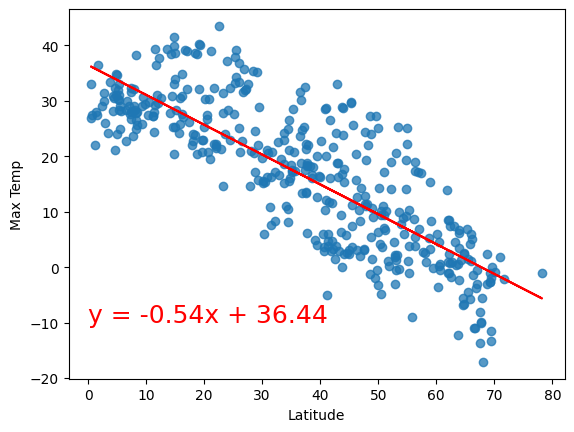

In [27]:
# Linear regression on Northern Hemisphere
plot_linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Latitude", "Max Temp", (0,-10))

The r value is: 0.7544848659490072
y = 0.39x + 30.03


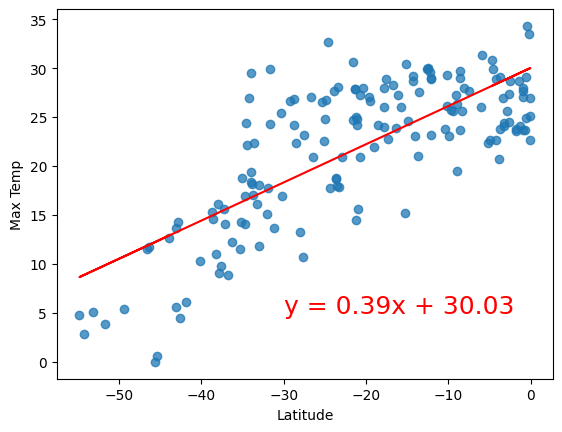

In [28]:
# Linear regression on Southern Hemisphere
plot_linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Latitude", "Max Temp", (-30,5))

**Discussion about the linear relationship:** The max temp generally increases as the city location comes closer to the equator. The correlation is very strong.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.14325314874852987
y = 0.19x + 54.98


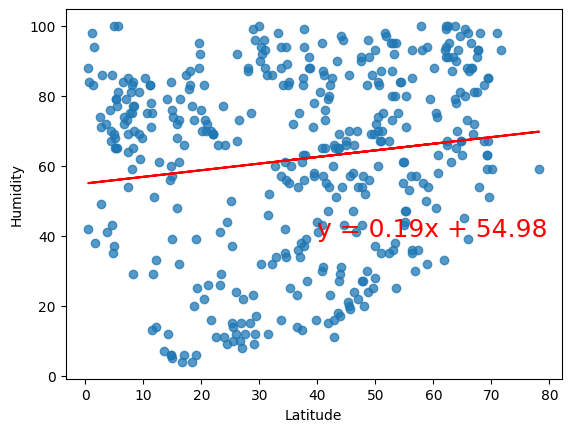

In [29]:
# Northern Hemisphere
plot_linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Latitude", "Humidity", (40,40))

The r value is: 0.09825280134581249
y = 0.12x + 79.53


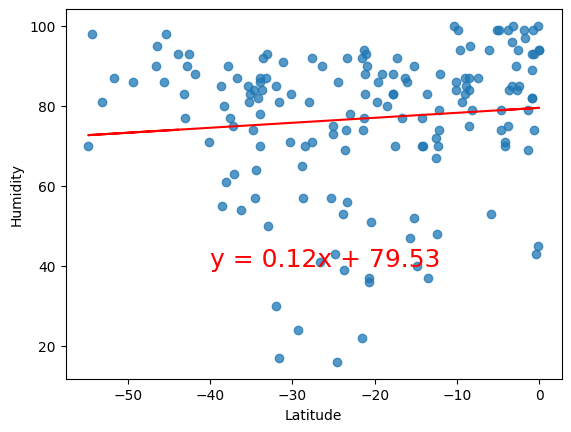

In [30]:
# Southern Hemisphere
plot_linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Latitude", "Humidity", (-40,40))

**Discussion about the linear relationship:** In the northern hemisphere, the humidity generally decreases as the city location comes closer to the equator, but it generally increases in the southern hemisphere as the location comes closer to the equator. The correlation isn't very strong, though.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.12429855394755543
y = 0.25x + 49.12


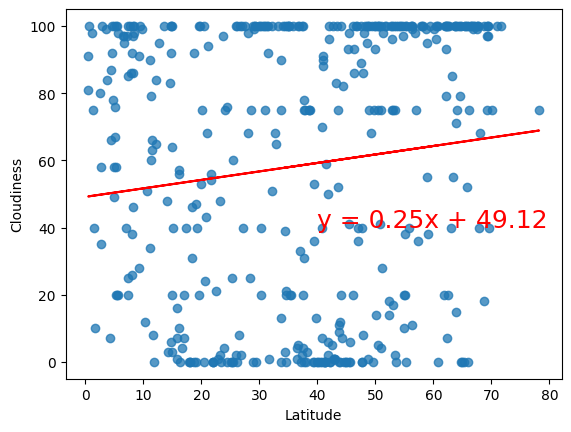

In [31]:
# Northern Hemisphere
plot_linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Latitude", "Cloudiness", (40,40))

The r value is: 0.22703165156567798
y = 0.62x + 68.42


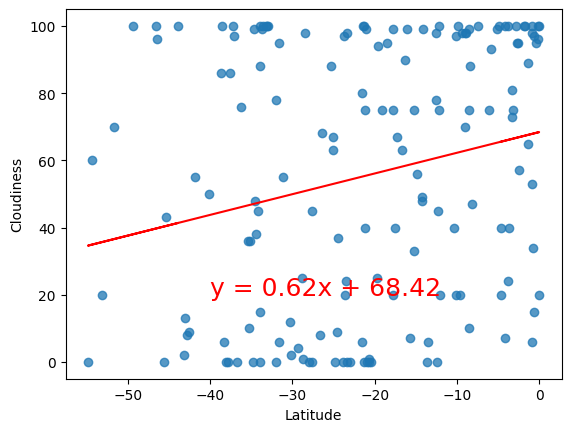

In [32]:
# Southern Hemisphere
plot_linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Latitude", "Cloudiness", (-40,20))

**Discussion about the linear relationship:** In the northern hemisphere, the cloudiness generally decreases as the city location comes closer to the equator. In the southern hemisphere, the cloudiness generally increases as the city location comes closer to the equator. The correlations are fairly weak, though.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.09440548578936814
y = 0.01x + 3.83


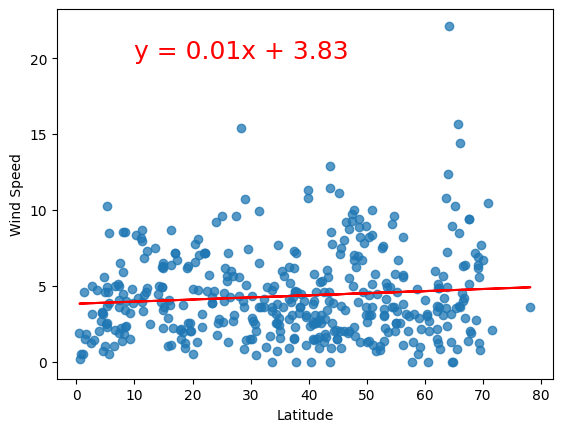

In [33]:
# Northern Hemisphere
plot_linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Latitude", "Wind Speed", (10,20))

The r value is: -0.25197907230976313
y = -0.04x + 2.26


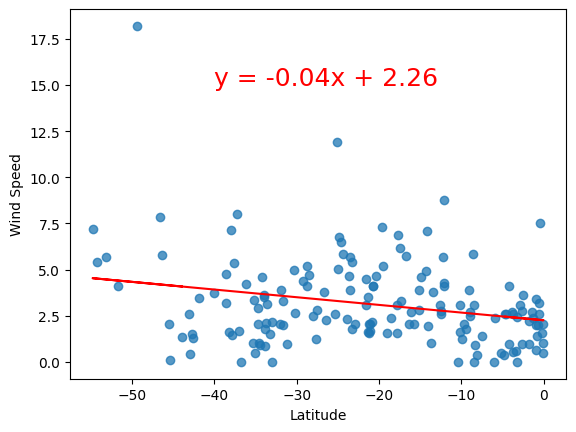

In [34]:
# Southern Hemisphere
plot_linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Latitude", "Wind Speed", (-40,15))

**Discussion about the linear relationship:** In the northern hemisphere, there's virtually no correlation between latitude and wind speed. In the south there is a very slight correlation, where wind speed generally decreases as the location moves closer to the equator.